In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
file_path = 'CANCER_TABLE.csv'
data = pd.read_csv(file_path, header=0, names=['diameter', 'cancer'])
data.head()

,diameter,cancer
0,6.309685,False
1,4.580894,False
2,6.310071,False
3,7.495139,False
4,2.216181,False


In [3]:
data['prediction'] = data['diameter'] > 7

In [4]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(data['cancer'], data['prediction'], labels = [0, 1])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['no cancer', 'has cancer'], columns=['Predicted no cancer', 'Predicted  has cancer'])
conf_matrix_df

,Predicted no cancer,Predicted has cancer
no cancer,689,118
has cancer,0,193


In [5]:
TN, FP, FN, TP = conf_matrix.ravel()

print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print("TP (True Positive): Number of correctly predicted sick subjects.")
print("TN (True Negative): Number of correctly predicted non-sick subjects.")
print("FP (False Positive): Number of subjects incorrectly predicted as sick.")
print("FN (False Negative): Number of subjects incorrectly predicted as non-sick.")

TP: 193, TN: 689, FP: 118, FN: 0
TP (True Positive): Number of correctly predicted sick subjects.
TN (True Negative): Number of correctly predicted non-sick subjects.
FP (False Positive): Number of subjects incorrectly predicted as sick.
FN (False Negative): Number of subjects incorrectly predicted as non-sick.


In [6]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("TPR (True Positive Rate): Proportion of actual sick subjects correctly identified by the model.")
print("FPR (False Positive Rate): Proportion of non-sick subjects incorrectly identified as sick by the model.")

TPR (True Positive Rate): Proportion of actual sick subjects correctly identified by the model.
FPR (False Positive Rate): Proportion of non-sick subjects incorrectly identified as sick by the model.


In [7]:
recall = TP / (TP + FN)
precision = TP / (TP + FP)

print(f"Recall: {recall}, Precision: {precision}")

Recall: 1.0, Precision: 0.6205787781350482


In [8]:
F1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {F1}")

F1 Score: 0.7658730158730159


# Marketing the New Ranking Model to the Customer

The ranking model allows doctors to prioritize patients based on their cancer risk. This precision enables timely intervention for those at the highest risk, potentially improving patient outcomes.
Also, Patients can be informed about their specific risk levels, which can help in managing expectations and planning appropriate preventive measures. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
file_path = 'CANCER_TABLE.csv'
data = pd.read_csv(file_path, header=0, names=['diameter', 'cancer'])
data = data.sort_values(by='diameter', ascending=False)
data.head(3)

,diameter,cancer
428,9.994688,True
181,9.987769,True
600,9.964741,True


In [11]:
thresholds = data['diameter'].unique()
tpr_list = []
fpr_list = []

for threshold in thresholds:
    data['prediction'] = data['diameter'] >= threshold
    TP = ((data['prediction'] == 1) & (data['cancer'] == 1)).sum()
    TN = ((data['prediction'] == 0) & (data['cancer'] == 0)).sum()
    FP = ((data['prediction'] == 1) & (data['cancer'] == 0)).sum()
    FN = ((data['prediction'] == 0) & (data['cancer'] == 1)).sum()

    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0

    tpr_list.append(TPR)
    fpr_list.append(FPR)

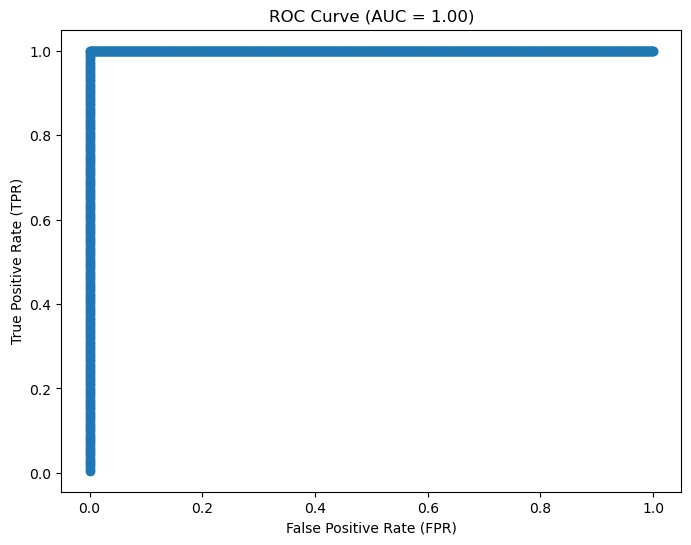

In [18]:
auc = np.trapz(tpr_list, fpr_list)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.scatter(fpr_list, tpr_list)
# plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve (AUC = {auc:.2f})')
plt.show()

The model is exceptional in terms of AUC, AUC value of 1 means that the model is able to perfectly distinguish between positive class and negative class.

The Business Meaning: A high AUC implies that the model is effective in prioritizing patients based on their cancer risk, leading to better patient outcomes and optimized resource use in healthcare settings.


For classification model its best to choose a model that maximizes the difference (TPR - FPR).
In our case it's the top left corner of the ROC curve.


In [19]:
best_threshold_idx = np.argmax(np.array(tpr_list) - np.array(fpr_list))
best_threshold = thresholds[best_threshold_idx]

# New classier :
data['prediction'] = data['diameter'] >= best_threshold


In [21]:
conf_matrix = confusion_matrix(data['cancer'], data['prediction'])
TN, FP, FN, TP = conf_matrix.ravel()

print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print results
print(f"Best Threshold: {best_threshold}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nMetrics:")
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(f"Recall (Sensitivity/TPR): {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")
print(f"True Positive Rate (FPR): {TPR:.2f}")

TP: 193, TN: 807, FP: 0, FN: 0
Best Threshold: 8.02744867175
Confusion Matrix:
[[807   0]
 [  0 193]]

Metrics:
TP: 193, TN: 807, FP: 0, FN: 0
Recall (Sensitivity/TPR): 1.00
Accuracy: 1.00
Precision: 1.00
F1 Score: 1.00
False Positive Rate (FPR): 0.00
True Positive Rate (FPR): 1.00


Ranker model is better since it classifies more samples correctly.

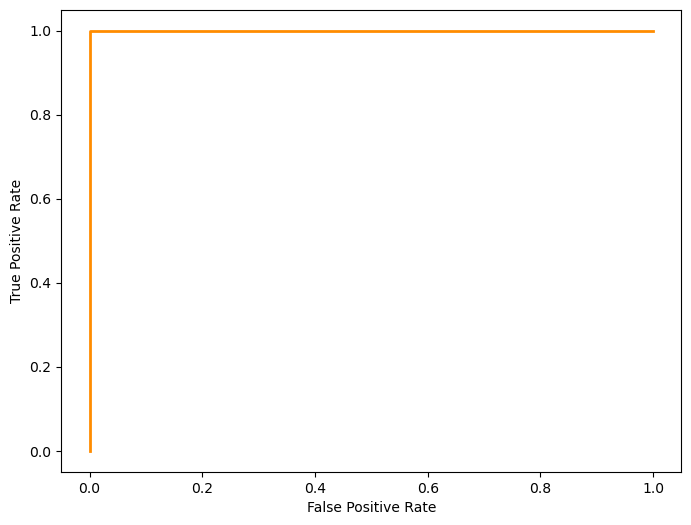

In [25]:
from sklearn.metrics import roc_curve, auc as calculate_auc

# Calculate ROC curve and AUC using scikit-learn
fpr, tpr, _ = roc_curve(data['cancer'], data['diameter'])
roc_auc = calculate_auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

